YASP Software (ООО "ЯСП")
1.	Исходные данные объединить в одном источнике (например в экселе)

2.	Определить:
- Какие заказчики наиболее прибыльны в товарной категории «женская обувь» в США?  (круговая диаграмма по прибыли заказчиков)
- Какова средняя скидка по продажам менеджеров из Парижа (таблица со скидками по каждому менеджеру по разным годам и общей скидкой)
- Какие дни недели наиболее продуктивны для продаж товарной категории «одежда для новорожденных» (график продаж по разным дням недели)


In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [131]:
category = pd.read_excel('Categories.xlsx')
customers = pd.read_excel('Customers.xlsx')
products = pd.read_excel('Products.xlsx')
orders = pd.read_excel('Orders.xlsx')
orders_details = pd.read_excel('Order Details.xlsx')
# !pip install xlrd
empoff = pd.read_excel('EmpOff.xls')

### Какие заказчики наиболее прибыльны в товарной категории «женская обувь» в США?  (круговая диаграмма по прибыли заказчиков)

In [43]:
customers_idlist = customers.loc[customers['Country'] == 'США']['CustomerID'].to_list()
customers_idlist

[32, 36, 43, 45, 48, 55, 65, 71, 75, 77, 78, 82, 89]

In [44]:
products_idlist = products.loc[products['CategoryID'] == 5]['ProductID'].to_list()
products_idlist

[22, 23, 42, 52, 56, 57, 64]

In [123]:
tmp_table = pd.merge(orders, orders_details, how='left', on='OrderID')
tmp_table2 = pd.merge(tmp_table, products.loc[products['ProductID'].isin(products_idlist)][['ProductID', 'UnitCost']],
                     how='left', on='ProductID')
end_table = tmp_table2.loc[(tmp_table['CustomerID'].isin(customers_idlist))
              & (tmp_table['ProductID'].isin(products_idlist))]


In [124]:
# в описании задачи не написано входит ли скидка уже в цену товара для клиента, тогда будем считать, что входит.
end_table['profit'] = (end_table['UnitPrice']*end_table['Quantity']) - (end_table['UnitCost']*end_table['Quantity'] )

task1_table = end_table.groupby('CustomerID', as_index=False).agg({'profit': 'sum'}).sort_values(by='profit', ascending=False)
task1_table = pd.merge(task1_table, customers, how='left', on='CustomerID')
task1_table

,CustomerID,profit,CompanyName,ContactName,Address,City,StateProvince,PostalCode,Country,Phone,Fax
0,32,1636.48,Магазинчик на Углу,Ross The Boss,2732 Baker Blvd.,Юджин,OR,97403,США,(503) 555-7555,NaN
1,82,1131.21,Бонд,Mark Stark,722 DaVinci Blvd.,Киркланд,WA,98034,США,(206) 555-8257,(206) 555-2174
2,65,176.26,X-Стайл,Malcolm X,2817 Milton Dr.,Альбукерке,NM,87110,США,(505) 555-5939,(505) 555-3620
3,75,166.02,Макарена,Paul Smith,P.O. Box 555,Ландер,WY,82520,США,(307) 555-4680,(307) 555-6525
4,89,85.28,Нирвана,Alice Chain,305 - 14th Ave. S._x000d_\nSuite 3B,Сиэттл,WA,98128,США,(206) 555-4112,(206) 555-4115
5,55,42.90,Спортивные товары,Al Bundy,2743 Bering St.,Анкоридж,AK,99508,США,(907) 555-7584,(907) 555-2880
6,48,9.25,Все Для ВАС,Andrea Pamelsson,89 Chiaroscuro Rd.,Портланд,OR,97219,США,(503) 555-9573,(503) 555-9646


Наиболее прибыльны заказчики "Магазинчик на Углу" и "Бонд" (CustomerID 32, 82)

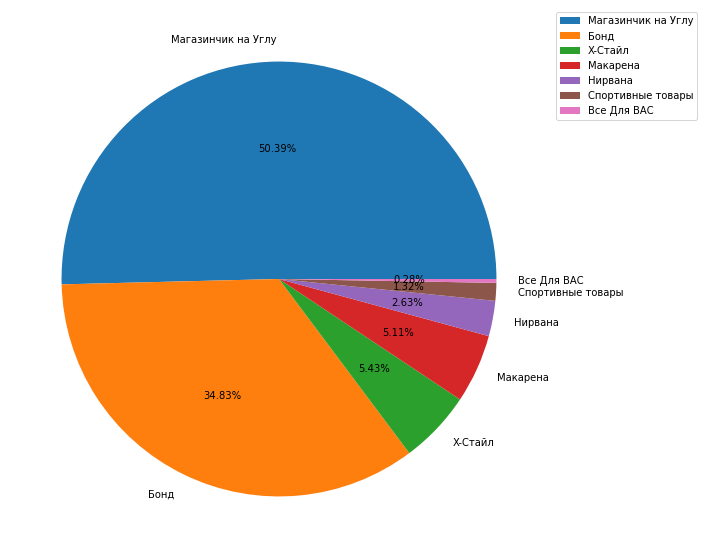

In [125]:
plt.figure(figsize=(10,10))
plt.pie(task1_table['profit'], labels=task1_table['CompanyName'], autopct='%1.2f%%')
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

-------------

### Какова средняя скидка по продажам менеджеров из Парижа (таблица со скидками по каждому менеджеру по разным годам и общей скидкой)

In [152]:
empoff.head(2)

,EmpID,Last Name,First Name,Title,Hire Date,Office,Extension,Reports To,Year Salary
0,44,Kent,Andrew,Account Manager,2004-01-31,2,204,7.0,55000
1,33,Lindquist,Ann,Storeman,2004-01-11,3,300,20.0,50100


In [140]:
customers_idlist_Paris = customers.loc[customers['City'] == 'Париж']['CustomerID'].to_list()
customers_idlist_Paris

[57, 74]

In [141]:
tmp_table.loc[tmp_table['CustomerID'].isin(customers_idlist_Paris)]

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,Freight,ProductID,UnitPrice,Quantity,Discount
1291,10738,74,4,2006-01-06,1,43.51,16,8.66,3,0.0
1714,10907,74,4,2006-09-21,1,72.85,75,7.68,14,0.0
1854,10964,74,4,2007-07-18,1,44.33,18,25.40,6,0.0
1855,10964,74,4,2007-07-18,1,44.33,38,87.28,5,0.0
1856,10964,74,4,2007-07-18,1,44.33,69,2.04,10,0.0


In [151]:
task2_table = pd.merge(tmp_table.loc[tmp_table['CustomerID'].isin(customers_idlist_Paris)],
                       empoff.rename(columns={'EmpID': 'EmployeeID'}), 
                       how='left', on='EmployeeID')


In [150]:
# таблица со скидками по каждому менеджеру по разным годам и общей скидкой
task2_table.groupby(['Last Name', 'First Name', 'OrderDate'], as_index=False).agg(
    {'Discount': 'mean'}).rename(columns={'Discount': 'mean_Discount'})

,Last Name,First Name,OrderDate,mean_Discount
0,Коллинс,Джоан,2006-01-06,0.0
1,Коллинс,Джоан,2006-09-21,0.0
2,Коллинс,Джоан,2007-07-18,0.0


### Какие дни недели наиболее продуктивны для продаж товарной категории «одежда для новорожденных» (график продаж по разным дням недели)

In [153]:
products_idlist_novo = products.loc[products['CategoryID'] == 8]['ProductID'].to_list()
products_idlist_novo

[10, 13, 18, 30, 36, 37, 40, 41, 46, 58, 73]

In [181]:
task3_table = tmp_table.loc[tmp_table['ProductID'].isin(products_idlist_novo)]

In [182]:
task3_table['total_sales'] = task3_table['UnitPrice']*task3_table['Quantity']
task3_table['OrderDate_TS'] = pd.to_datetime(task3_table['OrderDate'])
task3_table['OrderDate_TS'] = task3_table['OrderDate_TS'].apply(lambda x: x.dayofweek)
task3_table

,OrderID,CustomerID,EmployeeID,OrderDate,ShipperID,Freight,ProductID,UnitPrice,Quantity,Discount,total_sales,OrderDate_TS
5,10250,34,2,2007-02-03,2,79.17,41,9.59,10,0.00,95.90,5
22,10255,68,6,2007-01-08,1,43.89,36,7.77,25,0.00,194.25,0
33,10259,13,3,2005-02-12,2,30.11,37,4.37,1,0.00,4.37,5
34,10260,56,8,2006-07-15,2,56.99,41,10.02,16,0.25,160.32,5
45,10263,63,7,2007-02-18,2,30.64,30,26.57,60,0.25,1594.20,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2145,11077,73,9,2007-07-03,2,64.93,41,8.72,8,0.00,69.76,1
2146,11077,73,9,2007-07-03,2,64.93,46,11.63,8,0.02,93.04,1
2152,11077,73,9,2007-07-03,2,64.93,73,1.21,5,0.01,6.05,1
2157,11079,55,1,2006-11-14,3,49.50,13,25.50,10,0.05,255.00,1


In [189]:
task3_table = task3_table.groupby(['OrderDate_TS'], as_index=False).agg(
    {'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False)
task3_table

,OrderDate_TS,total_sales
1,1,23812.09
3,3,21782.24
2,2,20946.60
5,5,20152.70
4,4,18891.05
0,0,16101.86
6,6,6104.74


Наиболее продуктивны вторник, четверг.

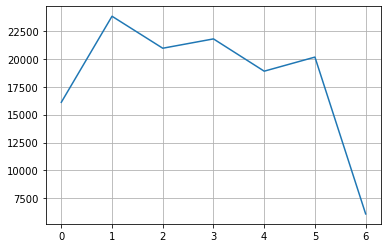

In [198]:
plt.plot(task3_table.sort_values(by='OrderDate_TS')['OrderDate_TS'],
         task3_table.sort_values(by='OrderDate_TS')['total_sales'])
plt.grid()